In [127]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
#matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import math 

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',',decimal=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('measurements.csv')
data = dataset.values
dataset.describe()
x = dataset.drop(columns='consume')
y = data[:, 1]
print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

del(dataset['refill liters'])
del(dataset['refill gas'])
del(dataset['specials'])

dataset.loc[dataset['gas_type'] == 'E10', "gas_type"] = 1
dataset.loc[dataset['gas_type'] == 'SP98', "gas_type"] = 0

dataset['temp_inside']=dataset['temp_inside'].fillna(dataset["temp_inside"].mean())


Dimensionalitat de la BBDD: (388, 12)
Dimensionalitat de les entrades X (388, 11)
Dimensionalitat de l'atribut Y (388,)
Per comptar el nombre de valors no existents:
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


In [128]:
dataset['distance']=1/(dataset['distance'])
#print(dataset['distance'])
dataset['speed']=1/(dataset['speed'])
dataset['time'] = dataset['distance']/dataset['speed']
print(min(dataset['time']))
x = dataset.drop(columns='consume')
#x = x.drop(columns='sun')
"""

x = x.drop(columns='distance')

x = x.drop(columns='temp_outside')
x = x.drop(columns='gas_type')
x = x.drop(columns='AC')

x = x.drop(columns='speed')
x = x.drop(columns='sun')
x = x.drop(columns='time')
"""
x=x.values

0.37914691943127965


In [129]:
from sklearn.metrics import r2_score

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def split_data(x, y, train_ratio=0.8):
    np.random.seed(5)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)


In [130]:
dataset=(dataset-dataset.mean())/dataset.std()#normalizacion
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2,random_state=1)

In [131]:
#para r^2 0.15 en test sin intercept

In [7]:
import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+speed+temp_inside+temp_outside+gas_type+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     57.52
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.66e-60
Time:                        17:08:23   Log-Likelihood:                -298.53
No. Observations:                 310   AIC:                             617.1
Df Residuals:                     300   BIC:                             654.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0284      0.037      0.774   

In [8]:
import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+gas_type+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     64.84
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           5.00e-61
Time:                        17:08:23   Log-Likelihood:                -298.67
No. Observations:                 310   AIC:                             615.3
Df Residuals:                     301   BIC:                             649.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0287      0.037      0.784   

In [9]:
import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     74.05
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           8.15e-62
Time:                        17:08:23   Log-Likelihood:                -299.06
No. Observations:                 310   AIC:                             614.1
Df Residuals:                     302   BIC:                             644.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0280      0.037      0.766   

In [10]:
import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     74.05
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           8.15e-62
Time:                        17:08:23   Log-Likelihood:                -299.06
No. Observations:                 310   AIC:                             614.1
Df Residuals:                     302   BIC:                             644.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0280      0.037      0.766   

In [11]:
import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+speed+temp_outside+AC+rain+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     86.34
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.21e-62
Time:                        17:08:23   Log-Likelihood:                -299.44
No. Observations:                 310   AIC:                             612.9
Df Residuals:                     303   BIC:                             639.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0283      0.037      0.774   

In [12]:
import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+temp_outside+AC+rain+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           9.07e-63
Time:                        17:08:23   Log-Likelihood:                -301.58
No. Observations:                 310   AIC:                             615.2
Df Residuals:                     304   BIC:                             637.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0274      0.037      0.745   

In [13]:
#de 0.15 a 0.19

In [132]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2,random_state=6)

In [133]:
#voy a probar con este que tiene valores de r_2 parecidos(pasamos de 0.67 a 0.71)

In [134]:

import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+speed+temp_inside+temp_outside+gas_type+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     32.98
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           5.17e-40
Time:                        18:05:49   Log-Likelihood:                -292.60
No. Observations:                 310   AIC:                             605.2
Df Residuals:                     300   BIC:                             642.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0228      0.036     -0.633   

In [135]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+temp_inside+temp_outside+gas_type+AC+rain+sun+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     37.23
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           8.19e-41
Time:                        18:05:50   Log-Likelihood:                -292.60
No. Observations:                 310   AIC:                             603.2
Df Residuals:                     301   BIC:                             636.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0228      0.036     -0.634   

In [136]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+temp_inside+temp_outside+gas_type+AC+rain+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     42.57
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.48e-41
Time:                        18:05:51   Log-Likelihood:                -292.81
No. Observations:                 310   AIC:                             601.6
Df Residuals:                     302   BIC:                             631.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0229      0.036     -0.639   

In [137]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+temp_inside+temp_outside+AC+rain+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     49.49
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.30e-42
Time:                        18:05:51   Log-Likelihood:                -293.33
No. Observations:                 310   AIC:                             600.7
Df Residuals:                     303   BIC:                             626.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0233      0.036     -0.649   

In [138]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+temp_outside+AC+rain+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     59.24
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           6.22e-43
Time:                        18:05:52   Log-Likelihood:                -293.77
No. Observations:                 310   AIC:                             599.5
Df Residuals:                     304   BIC:                             622.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0232      0.036     -0.645   

In [141]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ distance+temp_outside+rain+time-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.492
Model:                            OLS   Adj. R-squared (uncentered):              0.486
Method:                 Least Squares   F-statistic:                              74.23
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    6.56e-44
Time:                        18:06:05   Log-Likelihood:                         -294.77
No. Observations:                 310   AIC:                                      597.5
Df Residuals:                     306   BIC:                                      612.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [142]:
import statsmodels.formula.api as sm1
dta=dataset.values
train
est = sm1.ols(formula='consume ~  distance+I(temp_outside**2)+temp_outside+I(rain**2)+rain+I(time**2)+time',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     52.50
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           3.89e-44
Time:                        18:06:22   Log-Likelihood:                -288.73
No. Observations:                 310   AIC:                             591.5
Df Residuals:                     303   BIC:                             617.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1855 

In [23]:
dataset=(dataset-dataset.mean())/dataset.std()

In [24]:
dataset

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,time
0,-0.611,0.085,1.302,-0.432,0.092,1.192,-0.289,-0.375,-0.299,-1.166
1,-0.028,-0.689,0.743,-0.432,0.235,1.192,-0.289,-0.375,-0.299,-0.323
2,0.045,0.569,-0.023,-0.432,0.521,1.192,-0.289,-0.375,-0.299,0.157
3,-0.099,-0.980,0.136,-0.432,0.378,1.192,-0.289,-0.375,-0.299,-0.167
4,-0.387,-0.399,-0.523,-0.432,0.521,1.192,-0.289,-0.375,-0.299,-0.330
5,0.427,1.440,-0.713,-0.432,-0.194,1.192,-0.289,-0.375,-0.299,1.569
6,0.522,-0.496,-0.357,-0.432,-0.051,1.192,-0.289,-0.375,-0.299,1.295
7,-0.053,0.085,-0.167,-0.432,-0.766,1.192,-0.289,-0.375,-0.299,0.081
8,1.451,1.440,1.302,-0.432,-1.052,1.192,-0.289,-0.375,-0.299,1.184
9,-0.019,0.375,0.743,-0.432,-0.337,1.192,-0.289,-0.375,-0.299,-0.311


In [96]:
dataset_x = dataset.drop(columns='consume')
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(dataset_x)
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)


In [89]:
df = pd.DataFrame(reduced, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
df['consume']=dataset['consume']

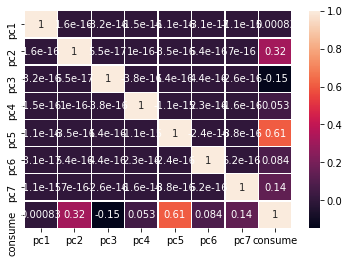

In [152]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio =df.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.25)
#print(correlacio['consume'])

In [100]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2,random_state=1)
#test malo

In [92]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ pc1+pc2+pc3+pc4+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     53.18
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           4.23e-49
Time:                        17:45:21   Log-Likelihood:                -329.45
No. Observations:                 310   AIC:                             674.9
Df Residuals:                     302   BIC:                             704.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0269      0.040      0.666      0.5

In [93]:

est = sm1.ols(formula='consume ~ pc2+pc3+pc4+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     62.25
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           5.13e-50
Time:                        17:45:50   Log-Likelihood:                -329.45
No. Observations:                 310   AIC:                             672.9
Df Residuals:                     303   BIC:                             699.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0268      0.040      0.666      0.5

In [94]:
est = sm1.ols(formula='consume ~ pc2+pc3+pc4+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.552
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              62.37
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    3.86e-50
Time:                        17:46:02   Log-Likelihood:                         -329.68
No. Observations:                 310   AIC:                                      671.4
Df Residuals:                     304   BIC:                                      693.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [95]:
est = sm1.ols(formula='consume ~ pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.548
Model:                            OLS   Adj. R-squared (uncentered):              0.541
Method:                 Least Squares   F-statistic:                              73.96
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    1.49e-50
Time:                        17:46:17   Log-Likelihood:                         -330.97
No. Observations:                 310   AIC:                                      671.9
Df Residuals:                     305   BIC:                                      690.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [102]:
est = sm1.ols(formula='consume ~ I(pc2**2)+I(pc3**2)+I(pc5**2)+I(pc6**2)+I(pc7**2)+pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              55.25
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    3.71e-62
Time:                        17:53:48   Log-Likelihood:                         -292.18
No. Observations:                 310   AIC:                                      604.4
Df Residuals:                     300   BIC:                                      641.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [105]:
est = sm1.ols(formula='consume ~ I(pc2**2)++I(pc5**2)+I(pc6**2)+I(pc7**2)+pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              61.55
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    4.94e-63
Time:                        17:55:08   Log-Likelihood:                         -292.26
No. Observations:                 310   AIC:                                      602.5
Df Residuals:                     301   BIC:                                      636.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [106]:
est = sm1.ols(formula='consume ~ I(pc2**2)+I(pc5**2)+I(pc6**2)+pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              69.36
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    6.70e-64
Time:                        17:55:14   Log-Likelihood:                         -292.42
No. Observations:                 310   AIC:                                      600.8
Df Residuals:                     302   BIC:                                      630.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [107]:
est = sm1.ols(formula='consume ~ I(pc2**2)+I(pc5**2)+pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              79.31
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    9.50e-65
Time:                        17:55:28   Log-Likelihood:                         -292.70
No. Observations:                 310   AIC:                                      599.4
Df Residuals:                     303   BIC:                                      625.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [110]:
est = sm1.ols(formula='consume ~ I(pc5**2)+pc2+pc3+pc5+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.68e-66
Time:                        17:56:16   Log-Likelihood:                -292.76
No. Observations:                 310   AIC:                             597.5
Df Residuals:                     304   BIC:                             619.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1202      0.039     -3.080      

In [111]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2,random_state=6)

In [112]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ pc1+pc2+pc3+pc4+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     36.04
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.88e-36
Time:                        17:57:04   Log-Likelihood:                -305.10
No. Observations:                 310   AIC:                             626.2
Df Residuals:                     302   BIC:                             656.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0285      0.037     -0.762      0.4

In [113]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ pc2+pc3+pc4+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     42.16
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.86e-37
Time:                        17:57:19   Log-Likelihood:                -305.13
No. Observations:                 310   AIC:                             624.3
Df Residuals:                     303   BIC:                             650.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0285      0.037     -0.765      0.4

In [114]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ pc2+pc3+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     50.67
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           4.27e-38
Time:                        17:57:30   Log-Likelihood:                -305.25
No. Observations:                 310   AIC:                             622.5
Df Residuals:                     304   BIC:                             644.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0281      0.037     -0.754      0.4

In [115]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ pc2+pc3+pc5+pc6+pc7-1',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                                 OLS Regression Results                                
Dep. Variable:                consume   R-squared (uncentered):                   0.456
Model:                            OLS   Adj. R-squared (uncentered):              0.447
Method:                 Least Squares   F-statistic:                              51.12
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                    2.17e-38
Time:                        17:57:39   Log-Likelihood:                         -305.54
No. Observations:                 310   AIC:                                      621.1
Df Residuals:                     305   BIC:                                      639.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [119]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ I(pc2**2)+I(pc3**2)+I(pc5**2)+I(pc6**2)+I(pc7**2)+pc2+pc3+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     36.85
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.51e-46
Time:                        17:59:28   Log-Likelihood:                -274.72
No. Observations:                 310   AIC:                             571.4
Df Residuals:                     299   BIC:                             612.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1795      0.072     -2.479      

In [120]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ I(pc2**2)+I(pc3**2)+I(pc5**2)+I(pc7**2)+pc2+pc3+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     41.05
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.42e-47
Time:                        18:00:00   Log-Likelihood:                -274.79
No. Observations:                 310   AIC:                             569.6
Df Residuals:                     300   BIC:                             606.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1704      0.068     -2.519      

In [121]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ I(pc2**2)+I(pc3**2)+I(pc5**2)+pc2+pc3+pc5+pc6+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     46.21
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           4.33e-48
Time:                        18:00:12   Log-Likelihood:                -275.03
No. Observations:                 310   AIC:                             568.1
Df Residuals:                     301   BIC:                             601.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1786      0.067     -2.683      

In [122]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ I(pc2**2)+I(pc3**2)+I(pc5**2)+pc2+pc3+pc5+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     52.89
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           6.66e-49
Time:                        18:00:26   Log-Likelihood:                -275.19
No. Observations:                 310   AIC:                             566.4
Df Residuals:                     302   BIC:                             596.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1803      0.066     -2.716      

In [123]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ I(pc3**2)+I(pc5**2)+pc2+pc3+pc5+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

                            OLS Regression Results                            
Dep. Variable:                consume   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     61.25
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.96e-49
Time:                        18:00:41   Log-Likelihood:                -276.10
No. Observations:                 310   AIC:                             566.2
Df Residuals:                     303   BIC:                             592.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2417      0.048     -5.031      

In [143]:
dta=dataset.values
train
est = sm1.ols(formula='consume ~ I(pc3**2)+I(pc5**2)+pc2+pc3+pc5+pc7',data=train)
print(est.fit().summary())
model=est.fit()
ypred=model.predict(test)
consume_test=test.filter(['consume'])
consume_test=consume_test.values
consume_test
error = mse(consume_test, np.array(ypred)) # calculem error
r2 = r2_score(consume_test,np.array(ypred))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))

PatsyError: Error evaluating factor: NameError: name 'pc3' is not defined
    consume ~ I(pc3**2)+I(pc5**2)+pc2+pc3+pc5+pc7
                                      ^^^